In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split

# Helper Class
import project_utils as pu

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Labels

In [2]:
labels_df = pd.read_csv('data/secom_labels.data', sep=' ', header = None)
labels_df.columns = ['Label', 'Date']
labels_df['Date'] = pd.to_datetime(labels_df['Date'], format = "%d/%m/%Y %H:%M:%S")
print('labels_df shape = {}'.format(labels_df.shape))
labels_df.head()

labels_df shape = (1567, 2)


,Label,Date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


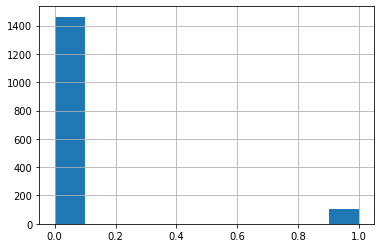

In [3]:
labels_df['Label'] = labels_df['Label'].apply(lambda x: 0 if x == -1 else 1)
labels_df['Label'].hist()

In [4]:
label_sum = labels_df['Label'].groupby(labels_df['Date'].dt.date).sum().reset_index()
label_count = labels_df['Label'].groupby(labels_df['Date'].dt.date).count().reset_index()
label_day = pd.merge(label_sum, label_count, on='Date')
label_day.columns = ['Date', 'Sum', 'Count']
label_day['Date'] = pd.to_datetime(label_day['Date'])
label_day.head()

,Date,Sum,Count
0,2008-07-19,3,12
1,2008-07-20,0,1
2,2008-07-21,1,2
3,2008-07-22,0,6
4,2008-07-23,0,2


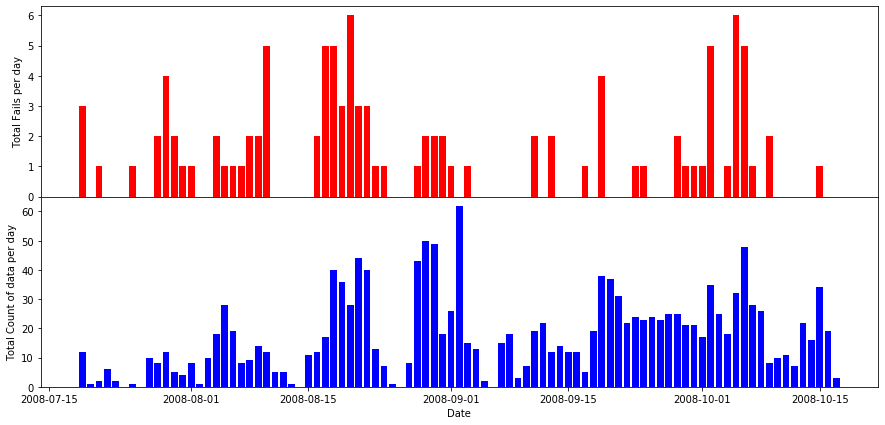

In [5]:
# Create a figure with shared X axis
fig, axs = plt.subplots(2, 1, sharex=True, figsize = (15,7))

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Set the width of the bars to be 1 day
#width = np.timedelta64(1, 'D')

# Plot the Sum of fails per day and count of entries per day
axs[0].bar(label_day['Date'], label_day['Sum'], color = 'red')
axs[1].bar(label_day['Date'], label_day['Count'], color = 'blue')
axs[0].set_ylabel('Total Fails per day')
axs[1].set_ylabel('Total Count of data per day')
axs[1].set_xlabel('Date');

# Data

In [6]:
data_df = pd.read_csv('data/secom.data', sep=' ', header = None)
print('data_df shape = {}'.format(data_df.shape))
data_df.columns = ['x_{}'.format(i) for i in range (0,590)]
data_df.head()

data_df shape = (1567, 590)


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_580,x_581,x_582,x_583,x_584,x_585,x_586,x_587,x_588,x_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


# Merging Data and Labels

In [7]:
merged_df = data_df.merge(labels_df, left_index=True, right_index=True)
print(merged_df.shape)
merged_df.head()

(1567, 592)


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_582,x_583,x_584,x_585,x_586,x_587,x_588,x_589,Label,Date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0,2008-07-19 15:22:00


# Method1: Split Train and Test randomly

In [8]:
X = merged_df.iloc[:,:-2]
y = merged_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create an object of the helper class
lp1 = pu.LabelsPrediction()

In [10]:
lp1.train_models(X_train, y_train, tuning='random')

sgd best F1 score: 0.2026
lr best F1 score: 0.1953
svc best F1 score: 0.1808
ab best F1 score: 0.2346
bag best F1 score: 0.2731
rf best F1 score: 0.2604
gbc best F1 score: 0.2831
Voting Classifier F1 score mean: 0.2111, stddev: 0.0908
Train time: 0:45:28.583613


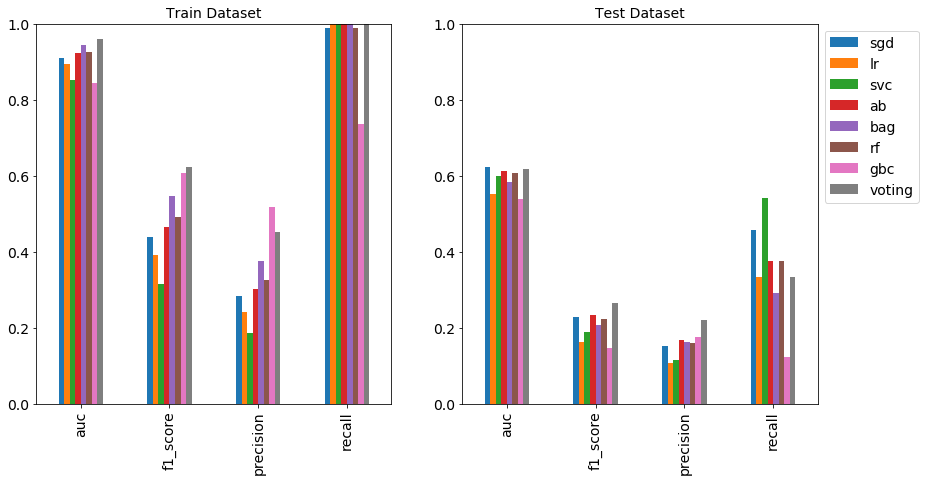

In [11]:
lp1.test_models(X_train, y_train, X_test, y_test)

The best models have roughly ~0.7 AUC on testing set. Voting model looks best overall with the highest AUC, precision and f1_score

## Method1 with Bayesian/Sequential Model Based Optimization using Hyperopt

In [12]:
lp2 = pu.LabelsPrediction()

In [13]:
lp2.train_models(X_train, y_train, tuning='hyperopt')

100%|█████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.56it/s, best loss: -0.21918208062136096]
sgd best F1 score: 0.2192
100%|█████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.36s/it, best loss: -0.21743540825247648]
lr best F1 score: 0.2174
100%|█████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.82s/it, best loss: -0.21086157043462544]
svc best F1 score: 0.2109
100%|█████████████████████████████████████████████████| 20/20 [14:19<00:00, 55.07s/it, best loss: -0.23658579496937482]
ab best F1 score: 0.2366
100%|██████████████████████████████████████████████████| 20/20 [25:37<00:00, 29.49s/it, best loss: -0.2279311492713027]
bag best F1 score: 0.2279
100%|█████████████████████████████████████████████████| 20/20 [13:27<00:00, 26.93s/it, best loss: -0.24658743486814277]
rf best F1 score: 0.2466
100%|█████████████████████████████████████████████████| 20/20 [02:58<00:00,  4.59s/it, best loss: -0.22711061054171916]
gbc bes

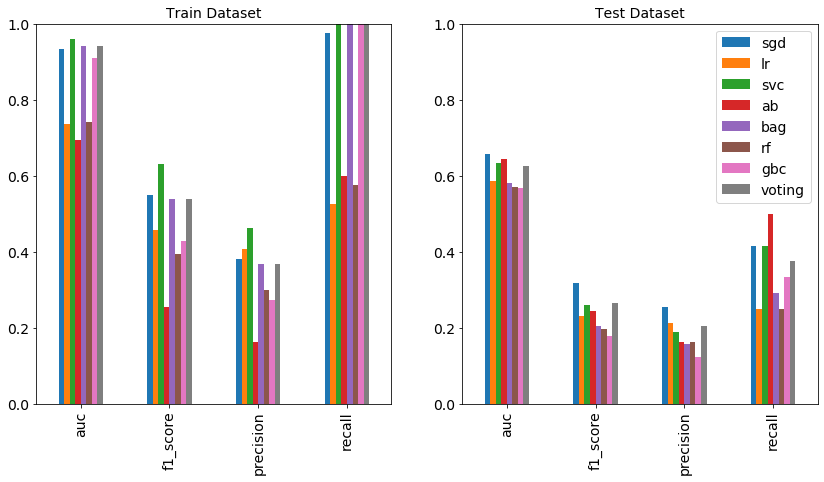

In [14]:
lp2.test_models(X_train, y_train, X_test, y_test)

# Method2: Split Train and Test by Date

In [15]:
# Split Train and Test by date
split_date = '2008-10-01'
train_df = merged_df[merged_df['Date'] < split_date]
test_df = merged_df[merged_df['Date'] >= split_date]
print('train df shape: {}, test df shape: {}'.format(train_df.shape, test_df.shape))

train df shape: (1208, 592), test df shape: (359, 592)


In [16]:
X_train_2 = train_df.iloc[:,:-2]
y_train_2 = train_df['Label']
X_test_2 = test_df.iloc[:,:-2]
y_test_2 = test_df['Label']

In [17]:
lp3 = pu.LabelsPrediction()

In [18]:
lp3.train_models(X_train_2, y_train_2, tuning='random')

sgd best F1 score: 0.1618
lr best F1 score: 0.1568
svc best F1 score: 0.1472
ab best F1 score: 0.3458
bag best F1 score: 0.2952
rf best F1 score: 0.3108
gbc best F1 score: 0.2573
Voting Classifier F1 score mean: 0.3182, stddev: 0.1840
Train time: 0:41:45.465249


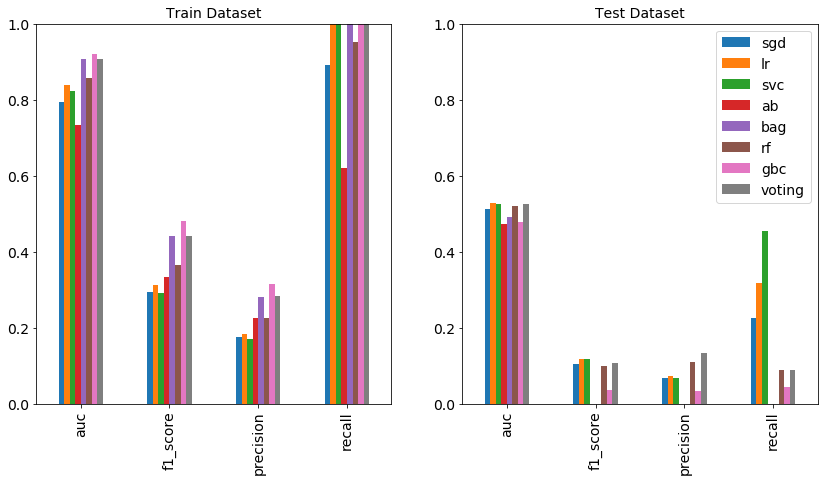

In [19]:
lp3.test_models(X_train_2, y_train_2, X_test_2, y_test_2)

In [20]:
lp4 = pu.LabelsPrediction()

In [21]:
lp4.train_models(X_train_2, y_train_2, tuning='hyperopt')

100%|█████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.26s/it, best loss: -0.14537294760854474]
sgd best F1 score: 0.1454
100%|██████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.64s/it, best loss: -0.1555030862674993]
lr best F1 score: 0.1555
100%|██████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.54it/s, best loss: -0.1474555863192464]
svc best F1 score: 0.1475
100%|█████████████████████████████████████████████████| 20/20 [12:38<00:00, 45.40s/it, best loss: -0.20466905005203703]
ab best F1 score: 0.2047
100%|█████████████████████████████████████████████████| 20/20 [24:16<00:00, 74.69s/it, best loss: -0.34373839909886184]
bag best F1 score: 0.3437
100%|█████████████████████████████████████████████████| 20/20 [24:06<00:00, 27.21s/it, best loss: -0.29296682010745934]
rf best F1 score: 0.2930
100%|██████████████████████████████████████████████████| 20/20 [01:56<00:00,  8.38s/it, best loss: -0.1932666731170468]
gbc bes

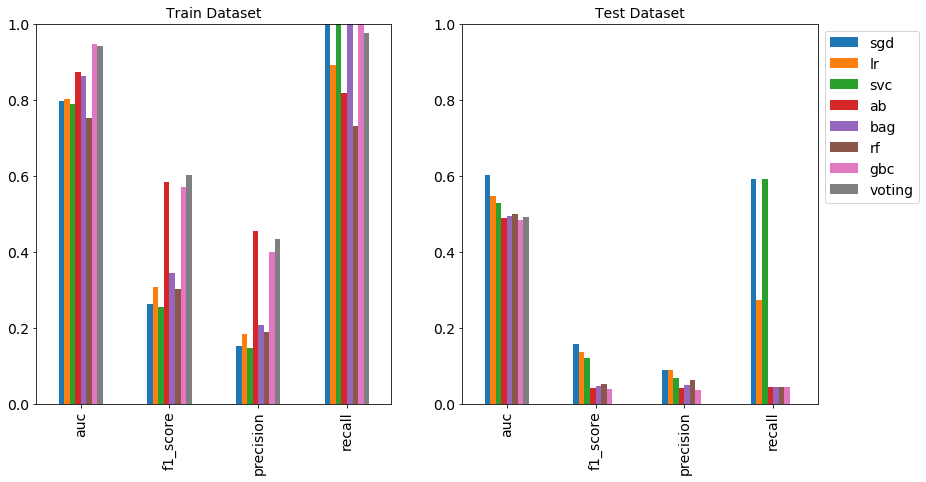

In [22]:
lp4.test_models(X_train_2, y_train_2, X_test_2, y_test_2)

Here SVC seems to be the best model with ~0.7 AUC and 0.6 recall

# Conclusion:
1. No good models could be found. Best model has ~0.7AUC
2. Depending on the test set, best model is either Ada Boost or SVC

# Study prediction errors

In [ ]:
y_pred_all, model_names = [], []
for model, estimator in lp.best_estimators.items():
    y_pred = estimator.predict(X_train)
    y_pred_all.append(y_pred)
    model_names.append(model)

In [ ]:
df = pd.DataFrame(y_pred_all).T
df.columns = model_names
df.head()

In [ ]:
df_merged = df.merge(y_train.reset_index(drop=True), left_index=True, right_index=True)
df_merged.head()

In [ ]:
corr=df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

In terms of predictions, some classifiers seems correlated to each other. Hence, let's try to build a voting classifier with only classifiers that dont correlate well

In [ ]:
new_vot_model = VotingClassifier(estimators=[('sgd', lp.best_estimators['sgd']),
                                             ('lr', lp.best_estimators['lr']),
                                             ('svc', lp.best_estimators['svc']),
                                             ('bag', lp.best_estimators['bag']),
                                             ('gbc', lp.best_estimators['gbc'])
                                            ], voting='hard')
scores = cross_val_score(new_vot_model, X_train, y_train, scoring='f1', cv=10)
new_vot_model.fit(X_train,y_train)
print('Train New Voting Classifier F1 score mean: {:.4f}, stddev: {:.4f}'.format(scores.mean(), scores.std()))

No improvement in cross val scores

In [ ]:
# Chi square
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

def feature_prescreen(df_data, X, y):      
    data_X = df_data[X]
    data_X = data_X.fillna(data_X.median()).fillna(0).as_matrix().astype(float)
    
    scaler = MinMaxScaler()
    data_X = scaler.fit_transform(data_X)    
    data_Y = df_data[y].apply(lambda x: 0 if x==0 else 1).as_matrix() 
    
    # Get top features
    feature_selector = SelectKBest(chi2, k='all') 
    feature_selector.fit(data_X, data_Y)
    feature_idx = np.arange(data_X.shape[1])[feature_selector.get_support()].tolist()
    features = np.array(X)[feature_idx].tolist()
    scores = feature_selector.scores_[feature_idx].tolist()    
    pvalues = feature_selector.pvalues_[feature_idx].tolist()    
    
    feature_prescreen_ranking = pd.DataFrame({'feature': features, 'score': scores, 'pvalue': pvalues})    
    feature_prescreen_ranking = feature_prescreen_ranking.sort_values(['score'], ascending=False).reset_index()   
    
    return feature_prescreen_ranking

df_modelling_data = X_train_imp_scaled.merge(y_train, left_index=True, right_index=True)
X = df_modelling_data.columns[:-1]
y = 'Label'

PRESCREEN_CHI_SQUARED_PVALUE = 0.5 #Tuning Parameter

feature_prescreen_ranking = feature_prescreen(df_modelling_data, X, y) 
prescreen_features = feature_prescreen_ranking[feature_prescreen_ranking['pvalue'] < PRESCREEN_CHI_SQUARED_PVALUE]['feature'].tolist()

# Split features (X) and response (y)
X_train = X_train_imp_scaled[prescreen_features].reset_index(drop=True)
X_test = X_test_imp_scaled[prescreen_features].reset_index(drop=True)